In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pull and format data

In [2]:
df = pd.read_csv('miamiHousePriceData.csv')

In [3]:
df.head(3)

,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,AGE,AVNO60PLUS,MONTH_SOLD,STRUCTURE_QUALITY,SALE_PRC
0,25.891031,-80.160561,622280070620,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4,"440,000"
1,25.891324,-80.153968,622280100460,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4,"349,000"
2,25.891334,-80.153740,622280100470,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4,"800,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   LND_SQFOOT         13932 non-null  int64  
 4   TOT_LVG_AREA       13932 non-null  int64  
 5   SPEC_FEAT_VAL      13932 non-null  int64  
 6   RAIL_DIST          13932 non-null  float64
 7   OCEAN_DIST         13932 non-null  float64
 8   WATER_DIST         13932 non-null  float64
 9   CNTR_DIST          13932 non-null  float64
 10  SUBCNTR_DI         13932 non-null  float64
 11  HWY_DIST           13932 non-null  float64
 12  AGE                13932 non-null  int64  
 13  AVNO60PLUS         13932 non-null  int64  
 14  MONTH_SOLD         13932 non-null  int64  
 15  STRUCTURE_QUALITY  13932 non-null  int64  
 16  SALE_PRC           139

#### To do:
- Convert SALE_PRC from string to numeric
- Drop Lat, Long, and ParcelNo (not relevant to price)
- Convert Age, AVNO, and Structure from int to str

In [5]:
df = pd.read_csv('miamiHousePriceData.csv', thousands=',')

In [6]:
df.drop(['LATITUDE', 'LONGITUDE', 'PARCELNO'], axis = 1, inplace = True)

In [7]:
df.head()

,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,AGE,AVNO60PLUS,MONTH_SOLD,STRUCTURE_QUALITY,SALE_PRC
0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4,440000
1,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4,349000
2,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4,800000
3,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4,988000
4,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4,755000


In [8]:
df['AVNO60PLUS'] = df['AVNO60PLUS'].astype(str)
df['MONTH_SOLD'] = df['MONTH_SOLD'].astype(str)
df['STRUCTURE_QUALITY'] = df['STRUCTURE_QUALITY'].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LND_SQFOOT         13932 non-null  int64  
 1   TOT_LVG_AREA       13932 non-null  int64  
 2   SPEC_FEAT_VAL      13932 non-null  int64  
 3   RAIL_DIST          13932 non-null  float64
 4   OCEAN_DIST         13932 non-null  float64
 5   WATER_DIST         13932 non-null  float64
 6   CNTR_DIST          13932 non-null  float64
 7   SUBCNTR_DI         13932 non-null  float64
 8   HWY_DIST           13932 non-null  float64
 9   AGE                13932 non-null  int64  
 10  AVNO60PLUS         13932 non-null  object 
 11  MONTH_SOLD         13932 non-null  object 
 12  STRUCTURE_QUALITY  13932 non-null  object 
 13  SALE_PRC           13932 non-null  int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.5+ MB


-----

### Prep for Linear Regression

<AxesSubplot:>

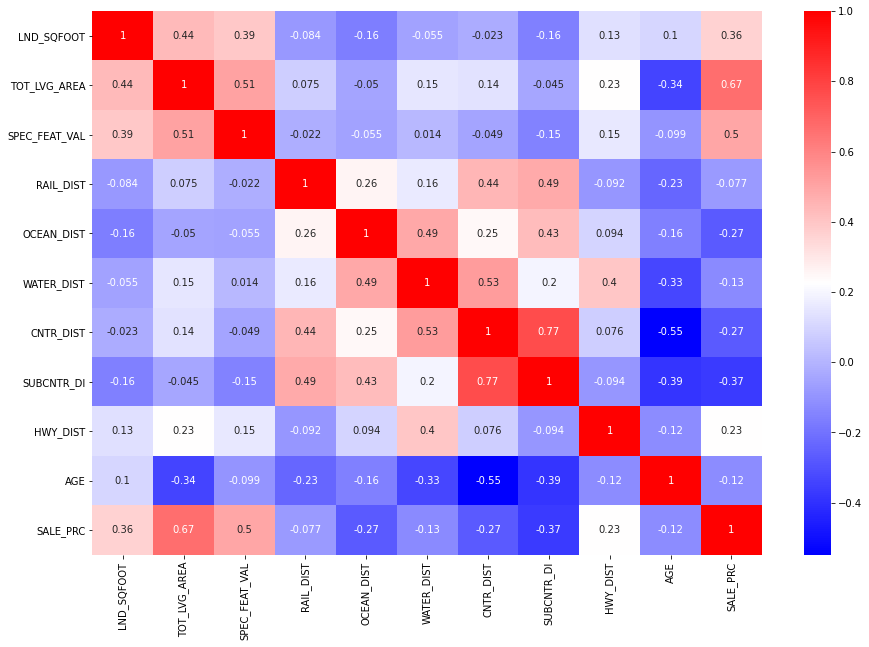

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='bwr')

### As rail distance had a correlation coefficient under |.1| may want to omit it from the model.

----

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df.drop(['AVNO60PLUS', 'MONTH_SOLD', 'STRUCTURE_QUALITY', 'SALE_PRC'], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

        features  vif_Factor
0     LND_SQFOOT    4.498526
1   TOT_LVG_AREA    9.435215
2  SPEC_FEAT_VAL    2.114928
3      RAIL_DIST    3.902058
4     OCEAN_DIST    8.883481
5     WATER_DIST    6.569143
6      CNTR_DIST   30.887829
7     SUBCNTR_DI   23.739788
8       HWY_DIST    3.312058
9            AGE    2.632472


#### VIF above 10 for cntr/subcnt distance, will remove center distance as subcenter will be applicable to more homes.

In [12]:
X=df.drop(['CNTR_DIST', 'AVNO60PLUS', 'MONTH_SOLD', 'STRUCTURE_QUALITY', 'SALE_PRC'], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

        features  vif_Factor
0     LND_SQFOOT    4.339724
1   TOT_LVG_AREA    8.627910
2  SPEC_FEAT_VAL    2.109679
3      RAIL_DIST    3.816798
4     OCEAN_DIST    6.723331
5     WATER_DIST    3.476286
6     SUBCNTR_DI    6.360638
7       HWY_DIST    3.308394
8            AGE    2.632176


#### VIF for all variables <10
#### Independent Variables for model creation chosen

----

# Linear Regression Model Creation

### With RAIL_DIST:

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['CNTR_DIST', 'SALE_PRC'], axis=1)
y = df['SALE_PRC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

clf = LinearRegression().fit(X_train, y_train)

print(f"R^2:  train: {round(clf.score(X_train, y_train), 3)}  | test: {round(clf.score(X_test, y_test), 3)}")
print(f"MAE:  train: {round(metrics.mean_absolute_error(y_train, clf.predict(X_train)))} | test: {round(metrics.mean_absolute_error(y_test, clf.predict(X_test)))}")
print(f"RMSE: train: {round(np.sqrt(metrics.mean_squared_error(y_train, clf.predict(X_train))))} | test: {round(np.sqrt(metrics.mean_squared_error(y_test, clf.predict(X_test))))}")

print()
print(f"Intercept: {round(clf.intercept_)}")
print()
print("Coefficients:")
for x, y in list(zip(X.columns, clf.coef_)):
    print(f'{x}: {round(y)}')

R^2:  train: 0.671  | test: 0.666
MAE:  train: 114006 | test: 119147
RMSE: train: 182397 | test: 181460

Intercept: 399595

Coefficients:
LND_SQFOOT: 8385
TOT_LVG_AREA: 160277
SPEC_FEAT_VAL: 40799
RAIL_DIST: 22801
OCEAN_DIST: -48304
WATER_DIST: -49802
SUBCNTR_DI: -72899
HWY_DIST: 30262
AGE: -24202
AVNO60PLUS: -8525
MONTH_SOLD: 299
STRUCTURE_QUALITY: 73532


### RAIL_DIST omitted:

In [16]:
X = df.drop(['RAIL_DIST', 'CNTR_DIST', 'SALE_PRC'], axis=1)
y = df['SALE_PRC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
clf = LinearRegression().fit(X_train, y_train)

print(f"R^2:  train: {round(clf.score(X_train, y_train), 3)}  | test: {round(clf.score(X_test, y_test), 3)}")
print(f"MAE:  train: {round(metrics.mean_absolute_error(y_train, clf.predict(X_train)))} | test: {round(metrics.mean_absolute_error(y_test, clf.predict(X_test)))}")
print(f"RMSE: train: {round(np.sqrt(metrics.mean_squared_error(y_train, clf.predict(X_train))))} | test: {round(np.sqrt(metrics.mean_squared_error(y_test, clf.predict(X_test))))}")

print()
print(f"Intercept: {round(clf.intercept_)}")
print()
print("Coefficients:")
for x, y in list(zip(X.columns, clf.coef_)):
    print(f'{x}: {round(y)}')

R^2:  train: 0.667  | test: 0.663
MAE:  train: 115384 | test: 120752
RMSE: train: 183447 | test: 182297

Intercept: 399595

Coefficients:
LND_SQFOOT: 7280
TOT_LVG_AREA: 162992
SPEC_FEAT_VAL: 40980
OCEAN_DIST: -47826
WATER_DIST: -47738
SUBCNTR_DI: -62622
HWY_DIST: 27624
AGE: -23885
AVNO60PLUS: -10328
MONTH_SOLD: 268
STRUCTURE_QUALITY: 74651


### Slightly lower R^2, but could be worth simplifying the model.
----

#### Even though [OCEAN_DIST and WATER_DIST] / [LND_SQFOOT and TOT_LVG_AREA] did not have a VIF above 10, their high correlation to eachother may affect the model's efficacy. May be worth testing model with one of each omitted.
---
### Models without OCEAN_DIST and LND_SQFOOT, chosen by correlation coefficient in relation to SALE_PRC

In [19]:
X = df.drop(['LND_SQFOOT', 'WATER_DIST', 'RAIL_DIST', 'CNTR_DIST', 'SALE_PRC'], axis=1)
y = df['SALE_PRC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
clf = LinearRegression().fit(X_train, y_train)

print(f"R^2:  train: {round(clf.score(X_train, y_train), 3)}  | test: {round(clf.score(X_test, y_test), 3)}")
print(f"MAE:  train: {round(metrics.mean_absolute_error(y_train, clf.predict(X_train)))} | test: {round(metrics.mean_absolute_error(y_test, clf.predict(X_test)))}")
print(f"RMSE: train: {round(np.sqrt(metrics.mean_squared_error(y_train, clf.predict(X_train))))} | test: {round(np.sqrt(metrics.mean_squared_error(y_test, clf.predict(X_test))))}")

print()
print(f"Intercept: {round(clf.intercept_)}")
print()
print("Coefficients:")
for x, y in list(zip(X.columns, clf.coef_)):
    print(f'{x}: {round(y)}')

R^2:  train: 0.655  | test: 0.651
MAE:  train: 118771 | test: 123358
RMSE: train: 186780 | test: 185419

Intercept: 399595

Coefficients:
TOT_LVG_AREA: 162277
SPEC_FEAT_VAL: 44559
OCEAN_DIST: -74737
SUBCNTR_DI: -54444
HWY_DIST: 11689
AGE: -10697
AVNO60PLUS: -7055
MONTH_SOLD: 91
STRUCTURE_QUALITY: 85950


### Minimal drop in r^2, minimal change in MAE and RMSE, likely the most optimized model.